# Sentiment analysis, classifying whether feedback left on a website is either positive or negative

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Grab and process the raw data.
data_path = ("/Users/colby/Desktop/Thinkful/Superv ML/amazon_cells_labelled.txt"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['review', 'positive']

sms_raw

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [9]:
keywords = ['slow', 'no', 'wouldn\'t', 'won\'t', 'gross', 'wasted', 'awful', 'avoid', 'lacked', 'flop', 'yuk', 'disgusting',
           'overpriced', 'gone', 'not', 'disappointed', 'slow', 'wrong', 'rude', 'never', 'suck', 'lacked']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
sms_raw['allcaps'] = sms_raw.review.str.isupper()

In [10]:
sms_raw['positive'] = (sms_raw['positive'] == 'positive')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


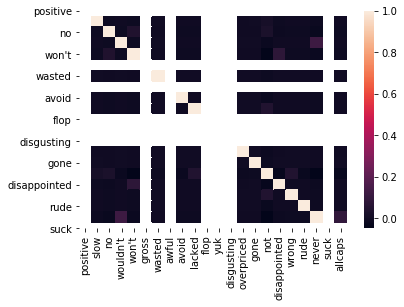

In [11]:
sns.heatmap(sms_raw.corr())

In [12]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['positive']

In [16]:
# Importing the  classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 0


In [7]:
print(target)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Name: positive, Length: 1000, dtype: bool
